<a href="https://colab.research.google.com/github/wymanwong/asset-management-system/blob/main/postgres-openai-vanna-vannadb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating SQL for Postgres using OpenAI via Vanna.AI (Recommended), Vanna Hosted Vector DB (Recommended)
This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../postgres-openai-standard-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../postgres-openai-azure-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../postgres-anthropic-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Anthropic</div>
        <small class="w-full">Use Anthropics Claude with your Anthropic API Key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../postgres-ollama-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../postgres-gemini-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Google Gemini</div>
        <small class="w-full">Use Google Gemini with your Gemini or Vertex API Key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../postgres-mistral-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../postgres-other-llm-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>
    


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../postgres-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../postgres-openai-standard-qdrant/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Qdrant</div>
        <small class="w-full">Use Qdrants open-source vector database</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../postgres-openai-standard-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../postgres-openai-standard-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>
    

## Setup

In [51]:
%pip install 'vanna[postgres]'

In [52]:
import vanna
from vanna.remote import VannaDefault

In [53]:
api_key = '9c04790845dd40b0a21d58c1195259d1'

vanna_model_name = 'rolemapping'
vn = VannaDefault(model=vanna_model_name, api_key=api_key)



<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which database do you want to query?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Postgres</div>
        <small class="w-full"></small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../mssql-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Microsoft SQL Server</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../mysql-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">MySQL</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../duckdb-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">DuckDB</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../snowflake-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Snowflake</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../bigquery-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">BigQuery</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">SQLite</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../oracle-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Oracle</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../other-database-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other Database</div>
        <small class="w-full">Use Vanna to generate queries for any SQL database</small>
      </div>
    </a>
  </li>
    
</ul>
    

In [55]:
vn.connect_to_postgres(host='ep-plain-breeze-a6m3x2hr.us-west-2.aws.neon.tech', dbname='neondb', user='neondb_owner', password='npg_A7dl1xZEJcOu', port='5432')

## Training
You only need to train once. Do not train again unless you want to add more training data.

In [ ]:

# The information schema query may need some tweaking depending on your database. This is a good starting point.
df_information_schema = vn.run_sql("SELECT * FROM INFORMATION_SCHEMA.COLUMNS")

# This will break up the information schema into bite-sized chunks that can be referenced by the LLM
plan = vn.get_training_plan_generic(df_information_schema)
plan

# If you like the plan, then uncomment this and run it to train
# vn.train(plan=plan)



In [ ]:

# The following are methods for adding training data. Make sure you modify the examples to match your database.

# DDL statements are powerful because they specify table names, colume names, types, and potentially relationships
vn.train(ddl="""
    CREATE TABLE IF NOT EXISTS my-table (
        id INT PRIMARY KEY,
        name VARCHAR(100),
        age INT
    )
""")

# Sometimes you may want to add documentation about your business terminology or definitions.
vn.train(documentation="Our business defines OTIF score as the percentage of orders that are delivered on time and in full")

# You can also add SQL queries to your training data. This is useful if you have some queries already laying around. You can just copy and paste those from your editor to begin generating new SQL.
vn.train(sql="SELECT * FROM my-table WHERE name = 'John Doe'")


In [ ]:
# At any time you can inspect what training data the package is able to reference
training_data = vn.get_training_data()
training_data

In [ ]:
# You can remove training data if there's obsolete/incorrect information.
vn.remove_training_data(id='1-ddl')


## Asking the AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

SQL Prompt: [{'role': 'system', 'content': 'You are a PostgreSQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\n    CREATE TABLE IF NOT EXISTS imported_data (\n        id SERIAL PRIMARY KEY,\n        department_name TEXT,\n        position TEXT,\n        bally_cage_glc TEXT,\n        bally_cage_glp TEXT,\n        bally_cage_lis TEXT,\n        bally_cage_oce TEXT,\n        bally_cmp_glc TEXT,\n        bally_cmp_glp TEXT,\n        bally_cmp_lis TEXT,\n        bally_cmp_oce TEXT,\n        bally_hub_other TEXT,\n        bally_sds_glc TEXT,\n        bally_sds_glp TEXT,\n        bally_sds_oc TEXT,\n        opera TEXT,\n        pos TEXT,\n        redrock TEXT,\n        vr TEXT,\n        wdts TEXT\n    )\n\n\n\n===Additional Context \n\n\n    Our role matrix defines access permissions across multiple systems:\n\n    1. Department Structure:\n 

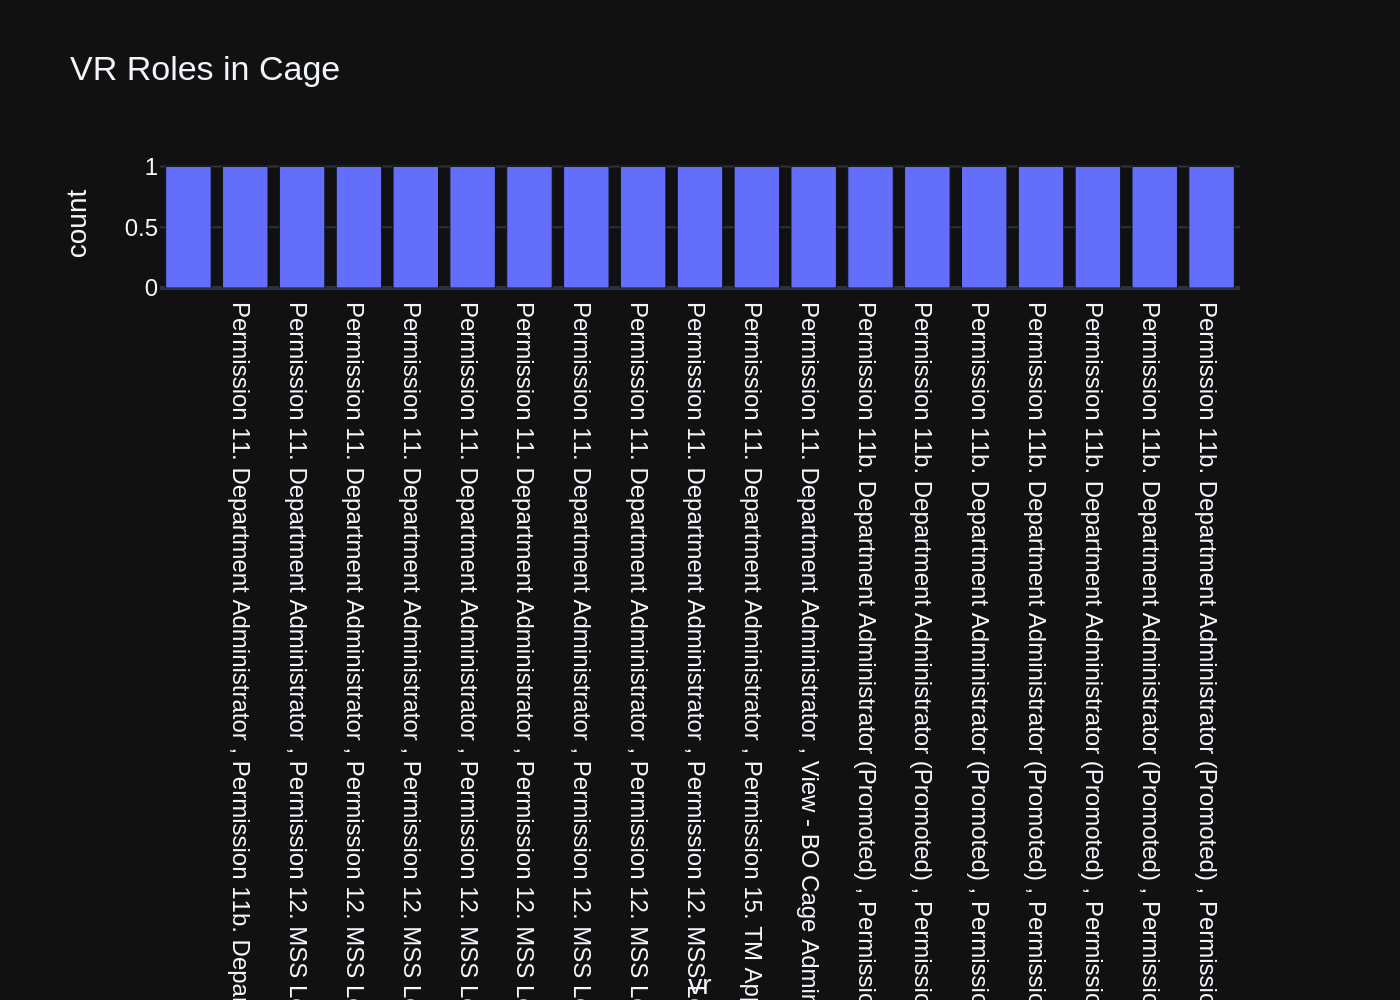

("SELECT DISTINCT vr \nFROM imported_data \nWHERE department_name ILIKE 'cage';",
                                                    vr
 0                                                    
 1   Permission 11. Department Administrator , Perm...
 2   Permission 11. Department Administrator , Perm...
 3   Permission 11. Department Administrator , Perm...
 4   Permission 11. Department Administrator , Perm...
 5   Permission 11. Department Administrator , Perm...
 6   Permission 11. Department Administrator , Perm...
 7   Permission 11. Department Administrator , Perm...
 8   Permission 11. Department Administrator , Perm...
 9   Permission 11. Department Administrator , Perm...
 10  Permission 11. Department Administrator , Perm...
 11  Permission 11. Department Administrator , View...
 12  Permission 11b. Department Administrator (Prom...
 13  Permission 11b. Department Administrator (Prom...
 14  Permission 11b. Department Administrator (Prom...
 15  Permission 11b. Department Admini

In [63]:
vn.ask('list all the role in VR in deaprtment cage')

## Launch the User Interface
![vanna-flask](https://vanna.ai/blog/img/vanna-flask.gif)

In [56]:
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn)
app.run()

Google Colab doesn't support running websocket servers. Disabling debug mode.
Try `serve_kernel_port_as_iframe` instead. 


<IPython.core.display.Javascript object>

Your app is running at:
https://0w9owg0mtoka-496ff2e9c6d22116-8084-colab.googleusercontent.com/
 * Serving Flask app 'vanna.flask'
 * Debug mode: off


## Next Steps
Using Vanna via Jupyter notebooks is great for getting started but check out additional customizable interfaces like the
- [Streamlit app](https://github.com/vanna-ai/vanna-streamlit)
- [Flask app](https://github.com/vanna-ai/vanna-flask)
- [Slackbot](https://github.com/vanna-ai/vanna-slack)
